In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
import math
import time
import networkx as nx
import pickle


from NeuralNetwork import * 
from Observation import *
from AgentModule import *
from InitializationVariables import *
from Environment import *
from Evolution import *

#Initialize environment and next_environment

with open('winner-feedforward', 'rb') as f:
    bestGene = pickle.load(f)

imported Neural Network module
Imported initialized Variables
imported Observation
imported Agent module
Imported environ
imported evolution module


Each environment if prefaced with what parameters are best to set in InitializationVariables.ipynb. When you set parameters, make sure to run the cell to recreate InitializationVariables.py which is the file that this notebook reads from. Each time you change that file, you must restart the kernal in this notebook.

## Simple Example

Params:
environment_xSize = 500
environment_ySize = 500

agent_radius = 5
vision_distance = environment_ySize

showRays = False #If true - visualizes the vision rays of agents. (RUNS MUCH SLOWER)

collisionKillsBoth = True #Do agents die if they collide with each other

agent_count = 30
steps_per_cycle = 200
maxVelocity = 5



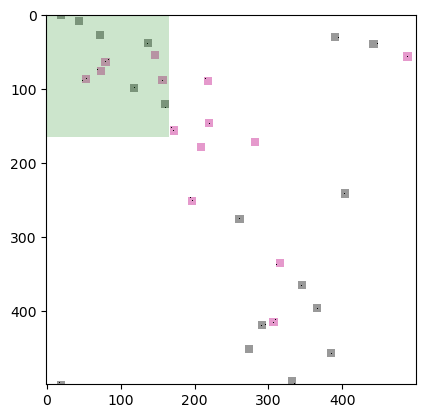

In [5]:
environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getEmptyBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()
agents = []
agents = initializeAgents(agent_count, agents, bestGene)
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)


## Long Corridor

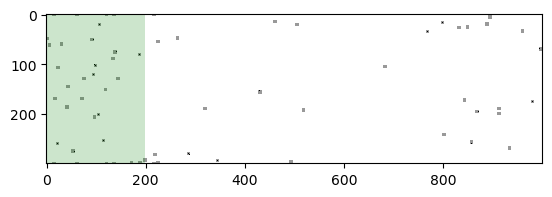

In [2]:
environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getEmptyBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()
survivalMask[0:-1,0:-1] = 0
survivalMask[:, 0 :environment_ySize//5   ]= 1

agents = []
agents = initializeAgents(agent_count, agents, bestGene)
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)


## Blocked Survival Zone

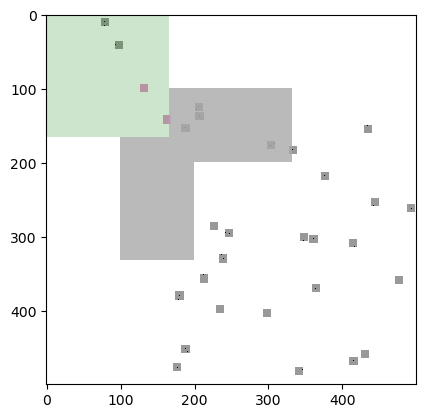

In [2]:
environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()
agents = []
agents = initializeAgents(agent_count, agents, bestGene)
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)


This is an example of how bad at exploring agents are. I think this is because they were trained to die when colliding, so unless they know where to go, it is dangerous to move at all. It would be interesting to train them with collisionKillsBoth as an input to their sensors and have it be a random variable for each generation. 

## lots of agents

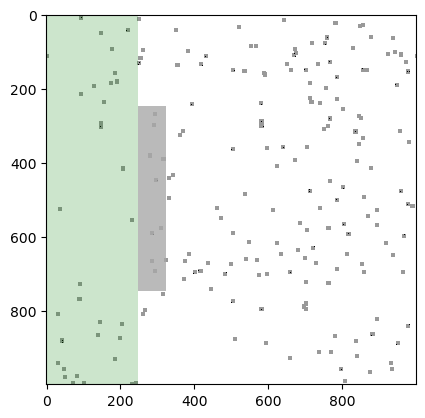

In [ ]:
environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getEmptyBarrierMask()
barrierMask[ 1*environment_ySize//4 :3*environment_ySize//4   , 1*environment_xSize//4 : round(1.3*environment_xSize//4)  ] = 1

distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()
survivalMask[0:-1,0:-1] = 0
survivalMask[:, 0 :environment_ySize//4   ]= 1

agents = []
agents = initializeAgents(agent_count, agents, bestGene)
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)


This simulation does not scale very well for large numbers of agents. However, it could be way worse. I think it is still O(n) time, however each agent uses a lot of computation to use the sight rays.

## Vision Example

In [3]:
showRays

False

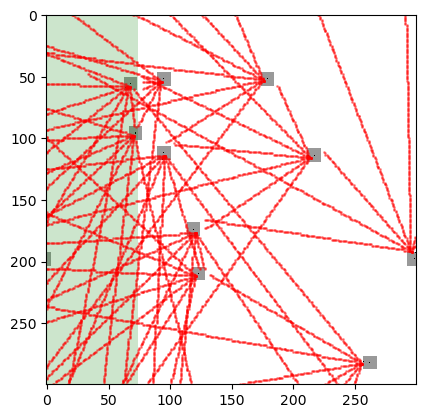

In [ ]:
environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getEmptyBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()
survivalMask[0:-1,0:-1] = 0
survivalMask[:, 0 :environment_ySize//4   ]= 1
agents = []
agents = initializeAgents(agent_count, agents, bestGene)
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)


As stated above, the vision accounts for most of the c